IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

READING AND UNDERSTANDING DATA

In [4]:
data=pd.read_csv("C:\\Users\\hsing\\Downloads\\news\\news.csv")

In [5]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [8]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
data.shape

(6335, 4)

DATA VISUALIZATION

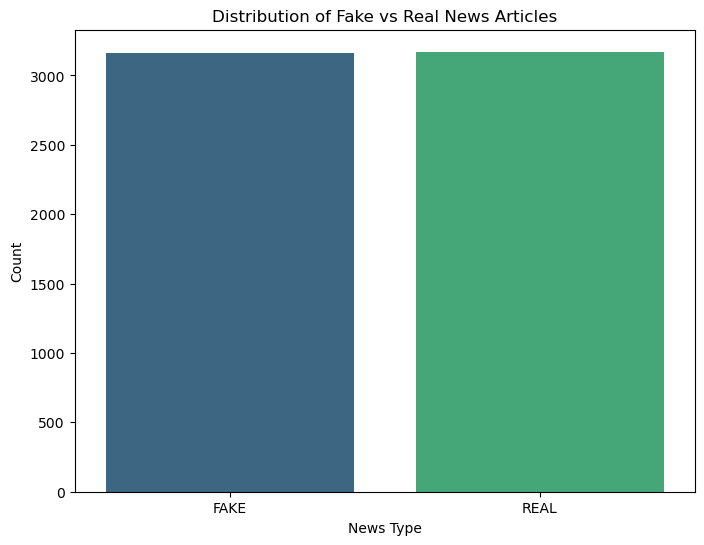

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribution of Fake vs Real News Articles')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


In [12]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
#DataFlair - Get the labels
labels=data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [14]:
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

INITALIZATION OF TFIDFVECTORIZER

In [17]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

Using Word Embeddings: Word2Vec and GloVe

In [25]:
import gensim
from gensim.models import Word2Vec
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Tokenize the text data
X_train_tokens = [text.split() for text in x_train]
X_test_tokens = [text.split() for text in x_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=2, sg=1)

# Average Word2Vec embeddings for each document
def get_average_word2vec(tokens_list, model, vector_size):
    embeddings = [model.wv[word] for word in tokens_list if word in model.wv]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(vector_size)

X_train_word2vec = np.array([get_average_word2vec(tokens, word2vec_model, 100) for tokens in X_train_tokens])
X_test_word2vec = np.array([get_average_word2vec(tokens, word2vec_model, 100) for tokens in X_test_tokens])

# Train a classifier using these embeddings
classifier = LogisticRegression()
classifier.fit(X_train_word2vec, y_train)

# Make predictions
y_pred_word2vec = classifier.predict(X_test_word2vec)

# Evaluate the model
accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
print(f'Word2Vec Model Accuracy: {accuracy_word2vec * 100:.2f}%')


Word2Vec Model Accuracy: 90.53%


INITIALIZATION OF PASSIVEAGGRESSIVECLASSIFIER

In [27]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.58%


In [28]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[589,  49],
       [ 45, 584]], dtype=int64)

In [29]:
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
x_train_tfidf = vectorizer.fit_transform(x_train).toarray()
x_test_tfidf = vectorizer.transform(x_test).toarray()

SUPPORT VECTOR MACHINE(SVM)

In [31]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', C=1, probability=True)

# Train the SVM model
svm_model.fit(x_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(x_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm * 100:.2f}%')


SVM Model Accuracy: 93.05%


RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(x_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Model Accuracy: 90.13%


IMPLEMENTATION OF CROSS-VALIDATION AND HYPER-PARAMETER TUNING

In [36]:
from sklearn.model_selection import GridSearchCV

# Using Random Forest with Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train_tfidf, y_train)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 90.67%


NEURAL NETWORKS (Multilayer Perceptron)

In [39]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10, random_state=42)

# Train the Neural Network model
nn_model.fit(x_train_tfidf, y_train)

# Make predictions
y_pred_nn = nn_model.predict(x_test_tfidf)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Model Accuracy: {accuracy_nn * 100:.2f}%')


Neural Network Model Accuracy: 91.79%


E:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
